In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
app_df = pd.read_csv('googleplaystore.csv')
app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
categorical = [var for var in app_df.columns if app_df[var].dtype=='O']
print(categorical)

['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [5]:
#print for values
rating = app_df["Rating"].unique()
reviews = app_df["Reviews"].unique()
size = app_df["Size"].unique()
installs = app_df["Installs"].unique()
type_ = app_df["Type"].unique()
price = app_df["Price"].unique()
content_rating = app_df["Content Rating"].unique()

In [6]:
#null check
app_df.isnull().any()
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#clean check
app_df_clean = app_df.dropna(how='any')
app_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


<h4>App Categories

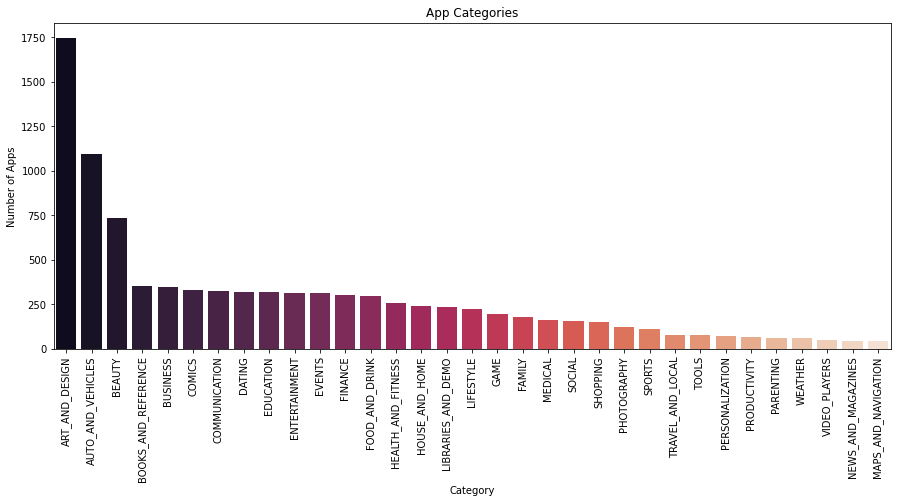

In [8]:
#cat var
cat =app_df_clean["Category"].unique()
cat_count= app_df_clean["Category"].value_counts()
cat_count_list = cat_count.tolist() #y
#cat_list = cat.tolist()

x = cat
y = cat_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

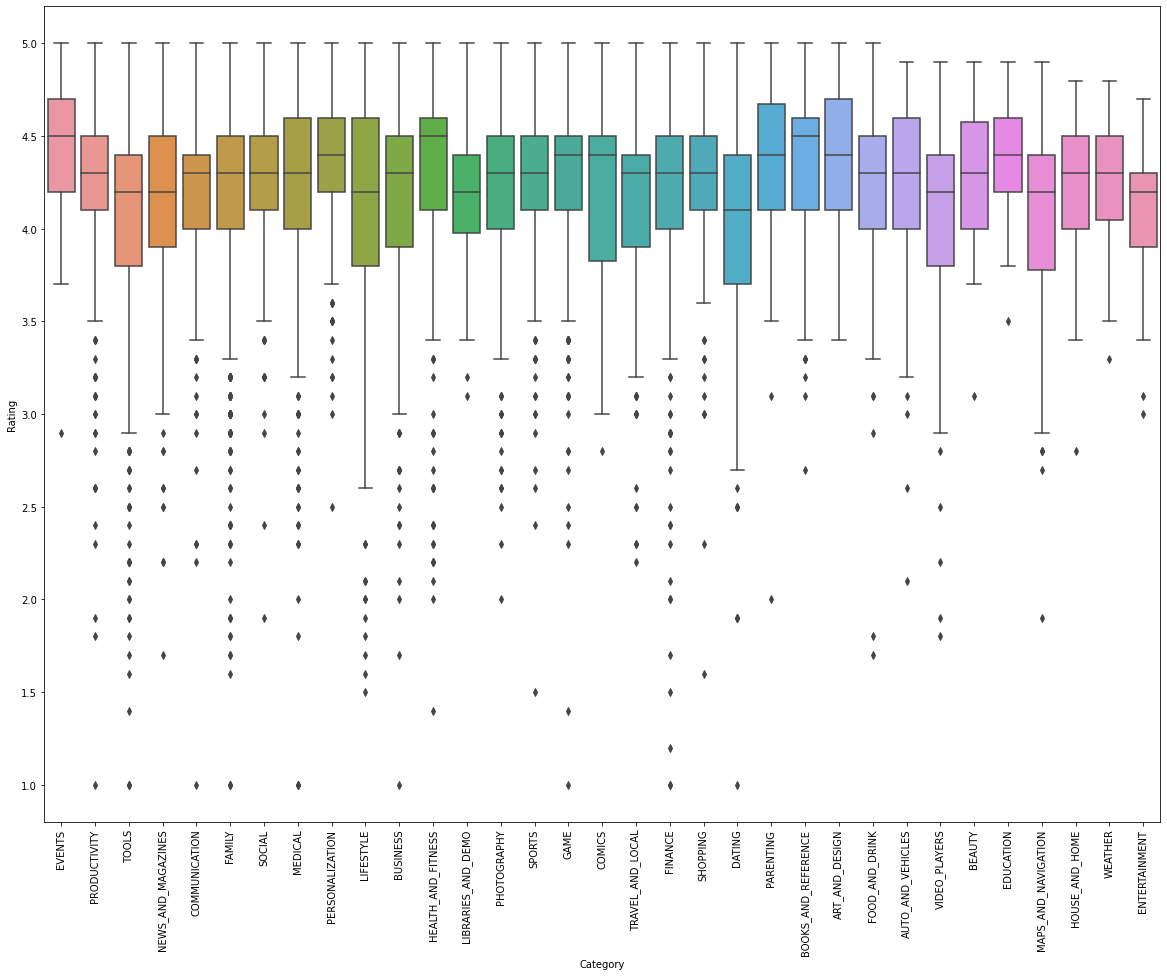

                      App
Category                 
ART_AND_DESIGN         61
AUTO_AND_VEHICLES      73
BEAUTY                 42
BOOKS_AND_REFERENCE   178
BUSINESS              303
COMICS                 58
COMMUNICATION         328
DATING                195
EDUCATION             155
ENTERTAINMENT         149
EVENTS                 45
FAMILY               1746
FINANCE               323
FOOD_AND_DRINK        109
GAME                 1097
HEALTH_AND_FITNESS    297
HOUSE_AND_HOME         76
LIBRARIES_AND_DEMO     64
LIFESTYLE             314
MAPS_AND_NAVIGATION   124
MEDICAL               350
NEWS_AND_MAGAZINES    233
PARENTING              50
PERSONALIZATION       312
PHOTOGRAPHY           317
PRODUCTIVITY          351
SHOPPING              238
SOCIAL                259
SPORTS                319
TOOLS                 733
TRAVEL_AND_LOCAL      226
VIDEO_PLAYERS         160
WEATHER                75


In [9]:
count_cat = app_df_clean.groupby(['Category']).count()
cat_df = pd.DataFrame(count_cat.App)
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()
print(cat_df)

<h4>App Genres

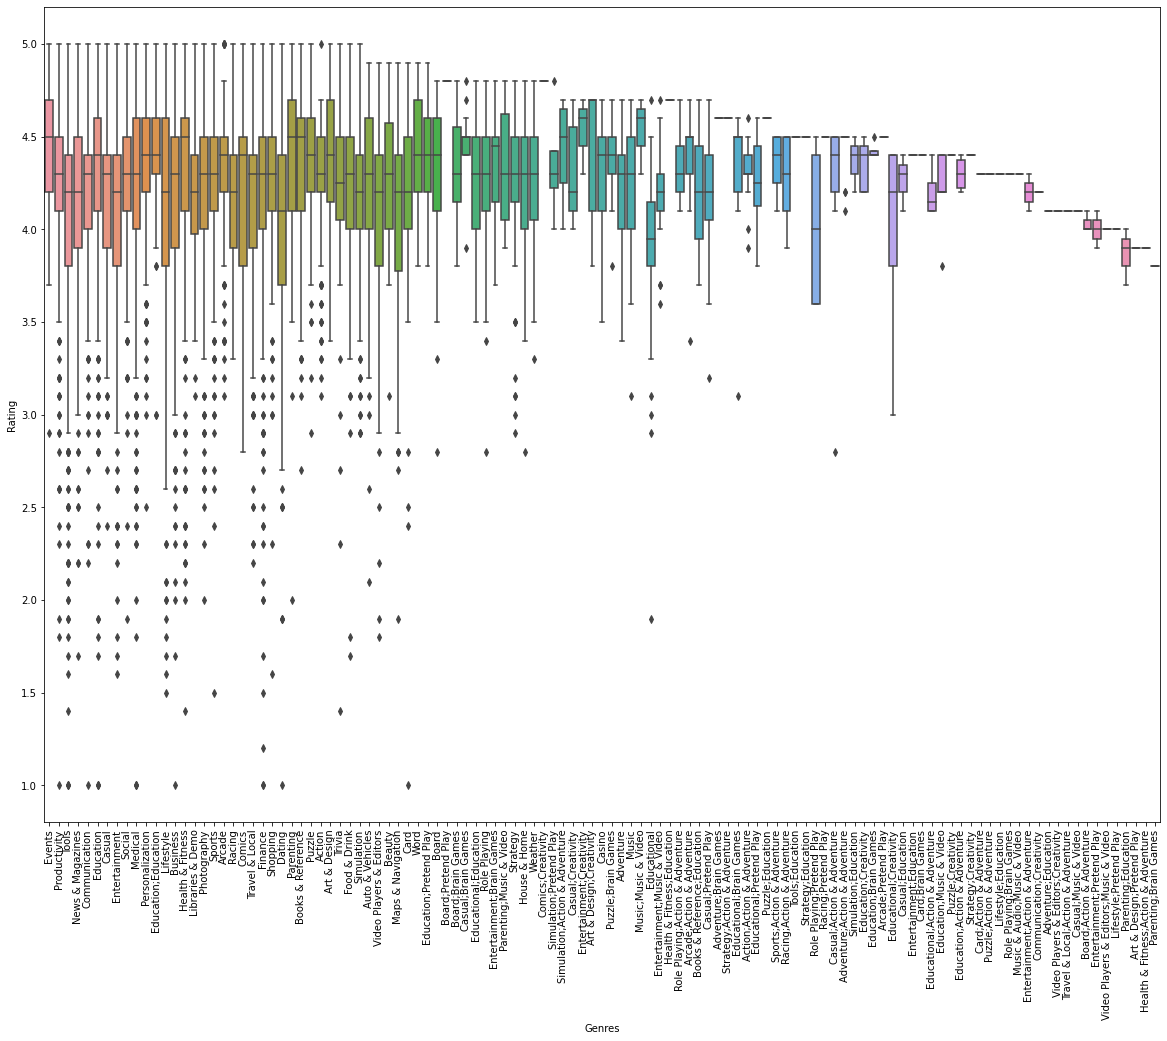

In [10]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
count_gen = app_df_clean.groupby(['Genres']).count()
gen_df = pd.DataFrame(count_gen.App)

plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()

<h4>App Ratings

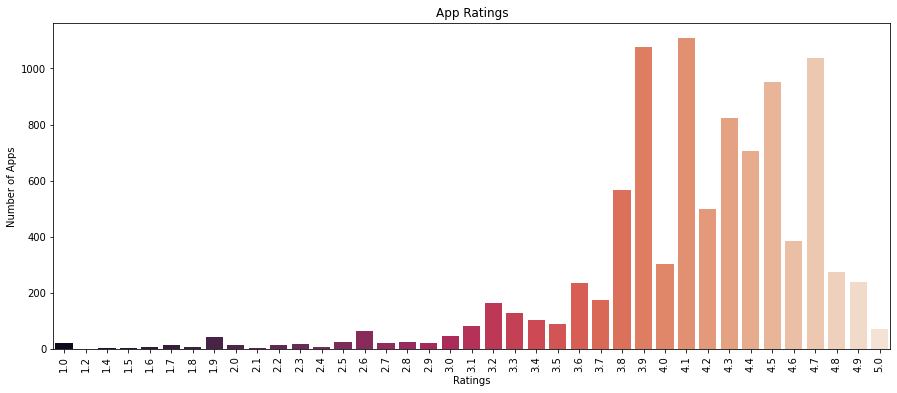

In [11]:
rating = app_df_clean["Rating"].unique()
rating_count= app_df_clean["Rating"].value_counts()
rating_count_list = rating_count.tolist() #y

x = rating
y = rating_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Apps")
plt.show()

In [12]:
#print(rating_count.sort_index())

<h5>missing values for 1.1, 1.3, 
<h5>less than 30 samples for all ratings < 2.8

Rating Histogram, Distribution

Text(0.5, 1.0, 'Rating Distribution')

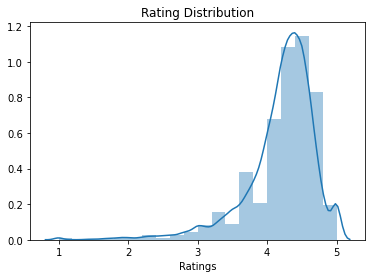

In [13]:
fig = sns.distplot(app_df_clean["Rating"], bins=20)   

fig.set_xlabel('Ratings')
plt.title('Rating Distribution')

Ratings binned 20 

In [14]:
min_value = app_df_clean['Rating'].min()
max_value = app_df_clean['Rating'].max()
rating_bins = np.linspace(min_value,max_value,20)
print(rating_bins)

[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
 2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
 3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
 4.78947368 5.        ]


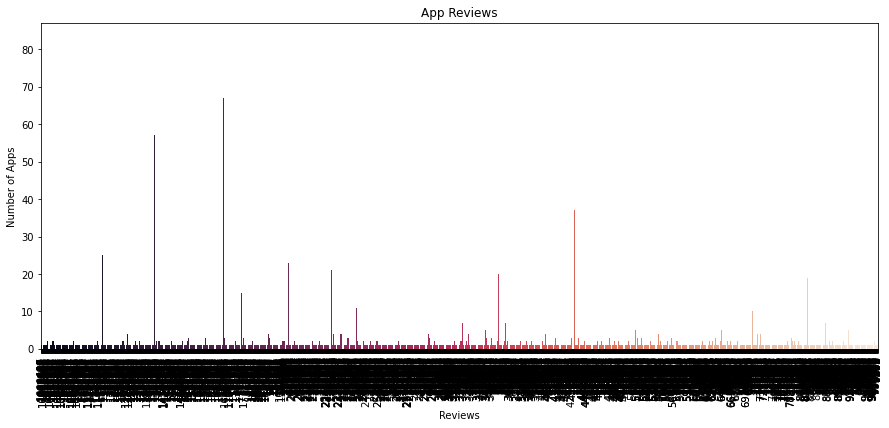

In [15]:
reviews =app_df_clean["Reviews"].unique()
review_count= app_df_clean["Reviews"].value_counts()
review_count_list = review_count.tolist() #y

x = reviews
y = review_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Reviews")
plt.xlabel("Reviews")
plt.ylabel("Number of Apps")
plt.show()

In [16]:
app_df_clean = app_df_clean.astype({'Reviews':int})

Text(0.5, 1.0, 'Reviews Distribution')

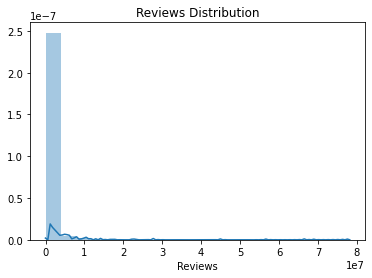

In [17]:
fig = sns.distplot(app_df_clean["Reviews"], bins=20)   

fig.set_xlabel('Reviews')
plt.title('Reviews Distribution')

In [18]:
min_value = app_df_clean["Reviews"].min()
max_value = app_df_clean["Reviews"].max()
median_value = app_df_clean["Reviews"].median()
mean_value = app_df_clean["Reviews"].mean()
print(median_value)
print(mean_value)
rating_bins = np.linspace(min_value,max_value, 100)
rating_bins.astype(int)

5955.0
514376.7052350427


array([       1,   789478,  1578956,  2368434,  3157912,  3947390,
        4736867,  5526345,  6315823,  7105301,  7894779,  8684257,
        9473734, 10263212, 11052690, 11842168, 12631646, 13421124,
       14210601, 15000079, 15789557, 16579035, 17368513, 18157991,
       18947468, 19736946, 20526424, 21315902, 22105380, 22894858,
       23684335, 24473813, 25263291, 26052769, 26842247, 27631724,
       28421202, 29210680, 30000158, 30789636, 31579114, 32368591,
       33158069, 33947547, 34737025, 35526503, 36315981, 37105458,
       37894936, 38684414, 39473892, 40263370, 41052848, 41842325,
       42631803, 43421281, 44210759, 45000237, 45789715, 46579192,
       47368670, 48158148, 48947626, 49737104, 50526582, 51316059,
       52105537, 52895015, 53684493, 54473971, 55263448, 56052926,
       56842404, 57631882, 58421360, 59210838, 60000315, 60789793,
       61579271, 62368749, 63158227, 63947705, 64737182, 65526660,
       66316138, 67105616, 67895094, 68684572, 69474049, 70263

<h4>App Installs

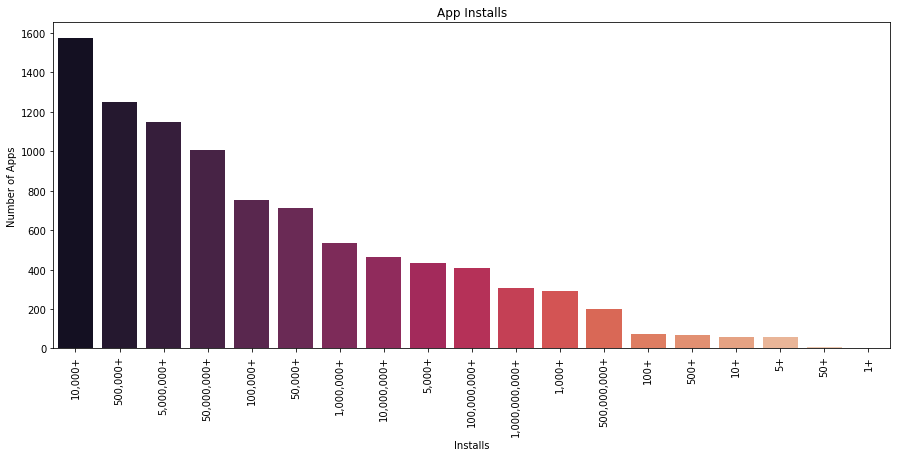

In [19]:
installs =app_df_clean["Installs"].unique()
installs_count= app_df_clean["Installs"].value_counts()
installs_count_list = installs_count.tolist() #y


x = installs
y = installs_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Installs")
plt.xlabel("Installs")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Types

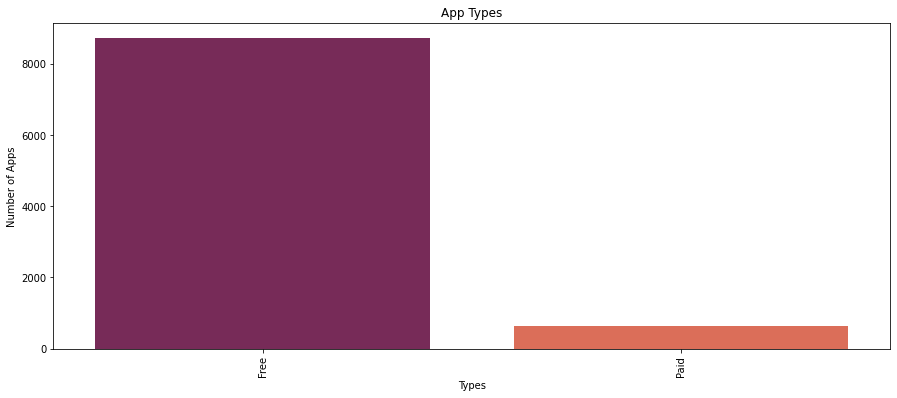

In [20]:
#cat var
type_ =app_df_clean["Type"].unique()
type_count= app_df_clean["Type"].value_counts()
type_count_list = type_count.tolist() #y
#cat_list = cat.tolist()

x = type_
y = type_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Types")
plt.xlabel("Types")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Price

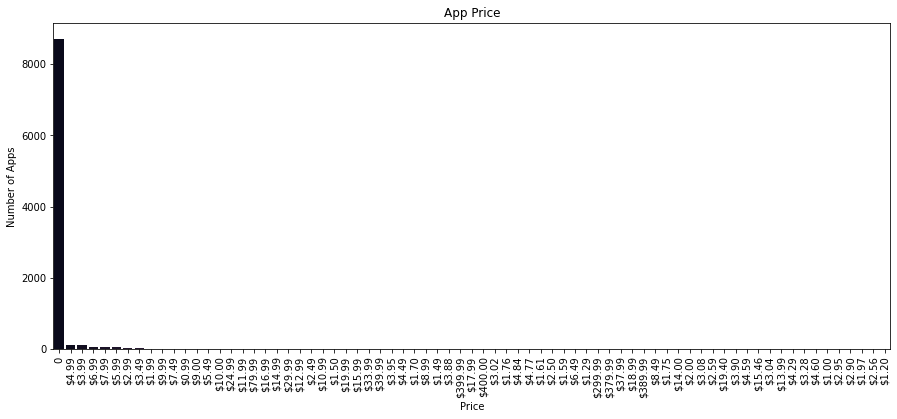

In [21]:
#cat var
price =app_df_clean["Price"].unique()
price_count= app_df_clean["Price"].value_counts()
price_count_list = price_count.tolist() #y
#cat_list = cat.tolist()

x = price
y = price_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Price")
plt.xlabel("Price")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Content Ratings

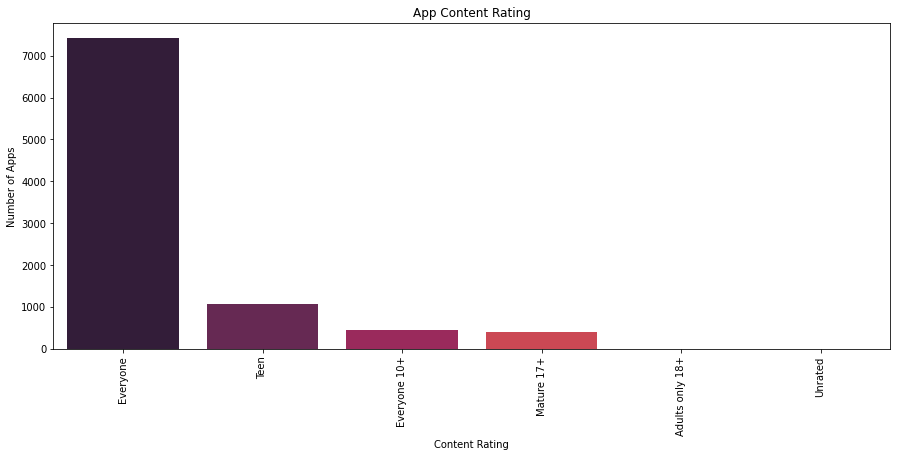

In [22]:
cr =app_df_clean["Content Rating"].unique()
cr_count= app_df_clean["Content Rating"].value_counts()
cr_count_list = cr_count.tolist() #y

x = cr
y = cr_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

In [23]:
app_df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
app_df_new  = app_df_clean[['App', 'Category','Rating','Reviews','Size','Installs','Type','Content Rating']]
app_df_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone


<b>Re-setting Columns 

In [25]:
reviews = app_df_new["Reviews"].unique()
print(reviews)

[   159    967  87510 ...    603   1195 398307]


In [26]:
app_df_new = app_df_new.astype({'Reviews':int})

In [27]:
size = app_df_new["Size"].unique()

In [28]:
app_df_new = app_df_new[app_df_new.Size != 'Varies with device']
app_df_new['Size'] =app_df_new['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
#alt mb option 
#app_df_new['Size'] =app_df_new['Size'].replace({'k': '*.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)

In [29]:
installs = app_df["Installs"].unique()
print(installs)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [30]:
app_df_new['Installs'] = app_df_new['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
#app_df_new['Installs'] = app_df_new.Installs.astype(int)

In [31]:
type_ = app_df_new["Type"].unique()
print(type_)

content_rating = app_df_new["Content Rating"].unique()
print(content_rating)

['Free' 'Paid']
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [32]:
#app_df_new = app_df_new[app_df_new.Price != 'Everyone'] 
#app_df_new['Price'] = app_df_new['Price'].apply(lambda x : x.strip('$'))
#app_df_new['Price'] = app_df_new.Price.astype(float)

<h4>One-hot encoding Category, Type, Content Rating DataFrame

In [33]:
categorical = [var for var in app_df_new.columns if app_df_new[var].dtype=='O']
print(categorical)

['App', 'Category', 'Installs', 'Type', 'Content Rating']


In [34]:
# Select the numeric columns
numeric_subset = app_df_new.select_dtypes('number')
categorical_subset = app_df_new.select_dtypes('object').drop('App', axis=1)

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns])
#numeric_subset = numeric_subset.drop("Rating", axis=1)

#axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [35]:
app_merge = app_df_new['App']
app_merge = pd.DataFrame(app_merge) #new dataframe with app name to merge with features dataframe 

In [36]:
#contains app name
features.join(app_merge, how='outer')
features_merged = features.merge(app_merge, how='outer', left_index=True, right_index=True)
features_merged.head()

,Rating,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Installs_500000000,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,App
0,4.1,159,19000000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook
1,3.9,967,14000000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Coloring book moana
2,4.7,87510,8700000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,4.5,215644,25000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,Sketch - Draw & Paint
4,4.3,967,2800000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Pixel Draw - Number Art Coloring Book


In [37]:
features_reset =features_merged.reset_index().drop('index', axis=1)
features_reset.head() 

,Rating,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Installs_500000000,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,App
0,4.1,159,19000000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook
1,3.9,967,14000000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Coloring book moana
2,4.7,87510,8700000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,4.5,215644,25000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,Sketch - Draw & Paint
4,4.3,967,2800000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Pixel Draw - Number Art Coloring Book


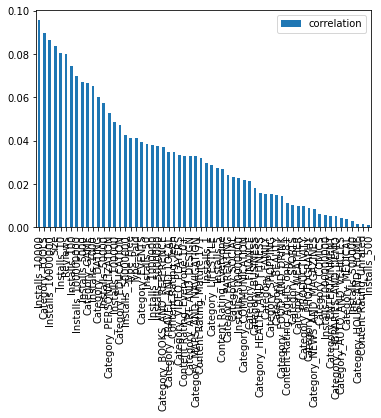

,correlation
Installs_10000,0.095554
Category_TOOLS,0.089536
Installs_10000000,0.086596
Size,0.083640
Installs_10,0.080622
Reviews,0.079819
Installs_100,0.074331
Installs_100000000,0.069647
Installs_5000,0.067258
Category_GAME,0.066667


In [38]:
correlation = pd.DataFrame({'correlation' : features.corr()["Rating"].abs().sort_values(ascending=False)[1:]})

correlation.plot(kind="bar")
plt.show()

correlation.head(10)

<h4>get_dummies to complete feature processing of app_df_new

In [39]:
app_df_new['Content Rating'] = pd.get_dummies(app_df_new['Content Rating'])

app_df_new['Type'] = pd.get_dummies(app_df_new['Type'])

app_df_new['Category'] = pd.get_dummies(app_df_new['Category'])

<h4>with Installs as Integer

In [40]:
#re-order columns for target
app_df_new = app_df_new[['Rating','Category','Reviews','Size','Installs','Type','Content Rating']]
app_df_new['Installs'] = app_df_new.Installs.astype(int)
app_df_reset = app_df_new.reset_index().drop('index', axis=1)
app_df_reset.head()

,Rating,Category,Reviews,Size,Installs,Type,Content Rating
0,4.1,1,159,19000000,10000,1,0
1,3.9,1,967,14000000,500000,1,0
2,4.7,1,87510,8700000,5000000,1,0
3,4.5,1,215644,25000000,50000000,1,0
4,4.3,1,967,2800000,100000,1,0


In [41]:
list(app_df_reset.columns)

['Rating', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


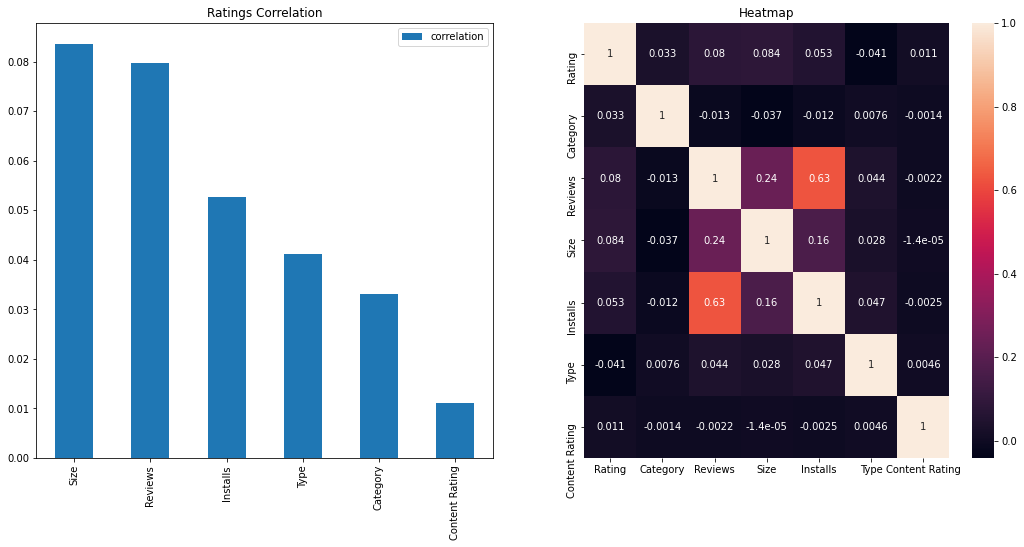

In [42]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

correlation = pd.DataFrame({'correlation' : app_df_reset.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=app_df_reset.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()

In [43]:
correlation

,correlation
Size,0.083640
Reviews,0.079819
Installs,0.052693
Type,0.041180
Category,0.033079
Content Rating,0.011114


<h4>With Installs as Categorical

In [44]:
features_corr = features.corr()
features_corr= features_corr.div(features_corr.sum(axis=1), axis =0)
features_corr.columns

Index(['Rating', 'Reviews', 'Size', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Installs_1',
       'Installs_10', 'Installs_100', 'Installs_1000', 'Installs_10000'

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


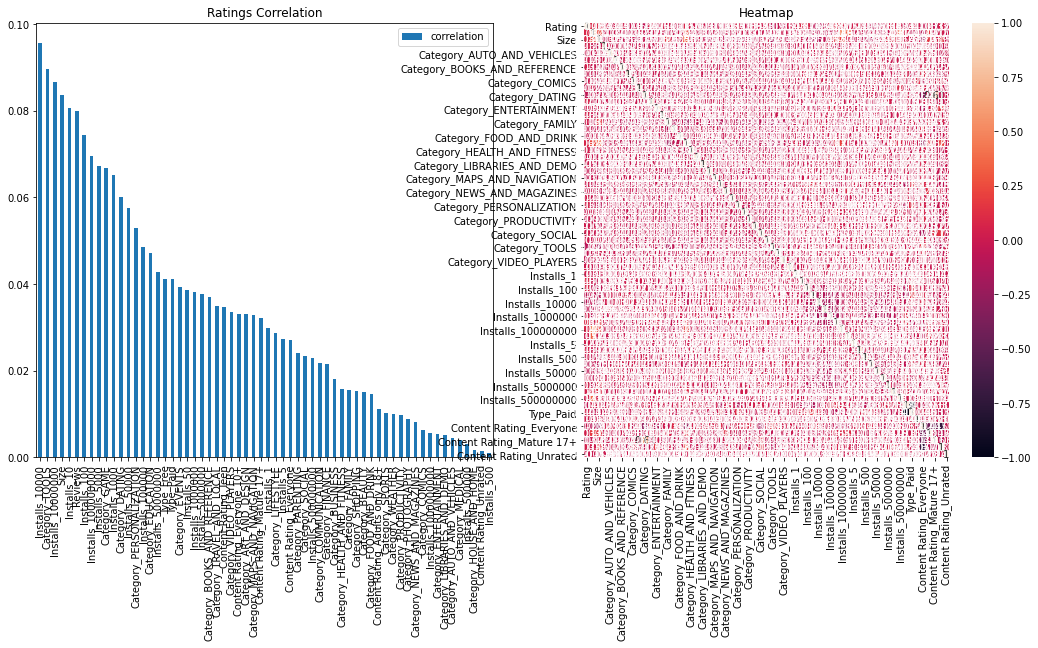

In [45]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

correlation = pd.DataFrame({'correlation' : features.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=features.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()

In [46]:
correlation

,correlation
Installs_10000,0.095554
Category_TOOLS,0.089536
Installs_10000000,0.086596
Size,0.083640
Installs_10,0.080622
...,...
Category_MEDICAL,0.003967
Installs_500000,0.003051
Category_HOUSE_AND_HOME,0.001794
Content Rating_Unrated,0.001545


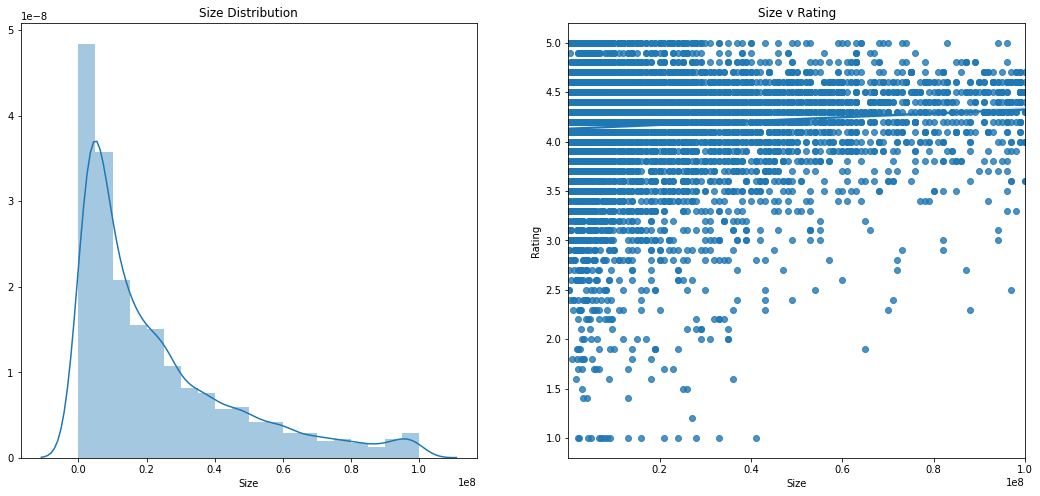

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = sns.distplot(app_df_new["Size"], bins=20, ax=ax[0]) 
ax[0].set_title('Size Distribution')
ax[0].set_xlabel('Size')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.regplot(data=app_df_new,x='Size',y='Rating')
ax[1].set_title("Size v Rating")
plt.show()

<h4>Scatter Size, Rating

<AxesSubplot:xlabel='Size', ylabel='Rating'>

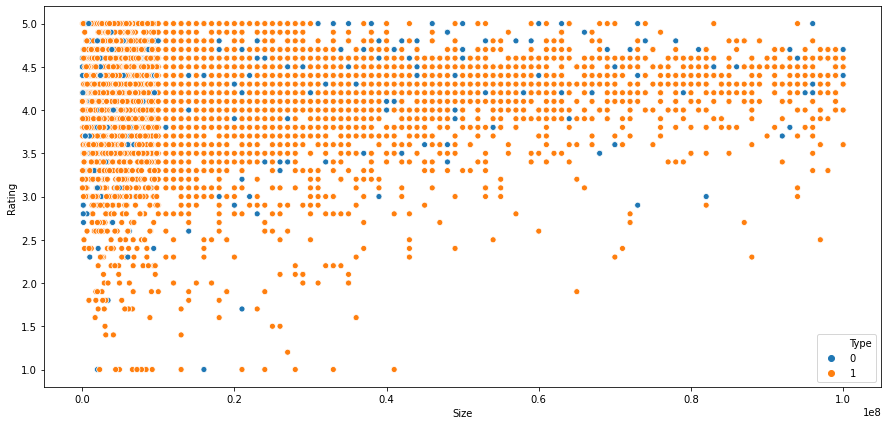

In [48]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_reset,x='Size',y='Rating',hue='Type')

<h4>Scatter Reviews, Rating 

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

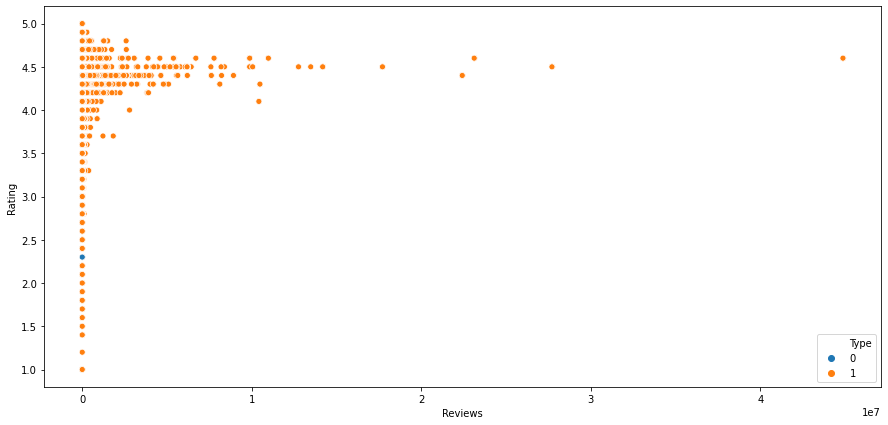

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_reset,x='Reviews',y='Rating',hue='Type')

<h4>Scatter Installs, Rating

<AxesSubplot:xlabel='Installs', ylabel='Rating'>

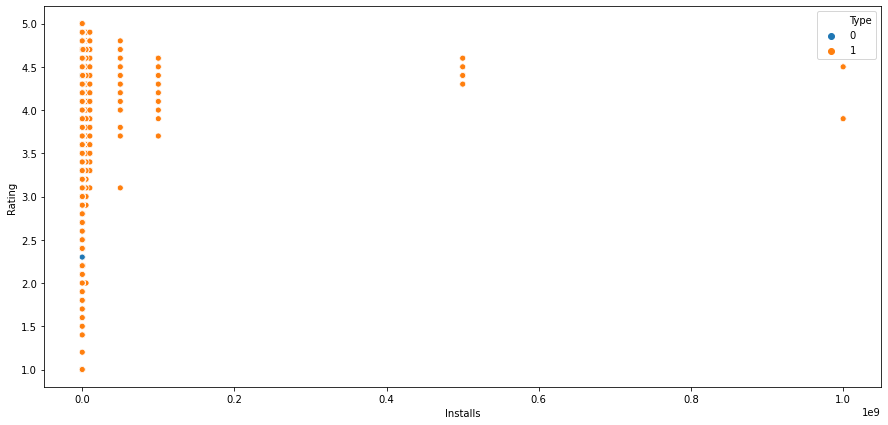

In [50]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_reset,x='Installs',y='Rating',hue='Type')

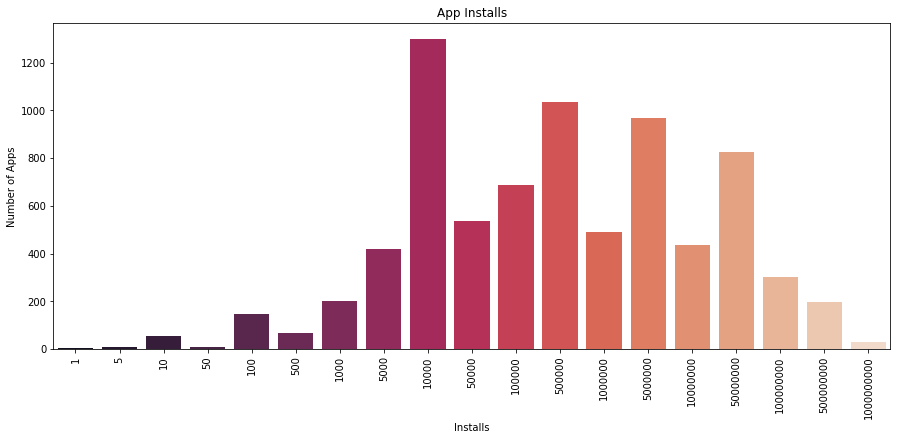

In [51]:
installs =app_df_reset["Installs"].unique()
installs_count= app_df_reset["Installs"].value_counts()
installs_count_list = installs_count.tolist() #y


x = installs
y = installs_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Installs")
plt.xlabel("Installs")
plt.ylabel("Number of Apps")
plt.show()

<h4>Random Forest Regressor to determine Feature, Permutation Importance

In [52]:
X=app_df_reset.iloc[:,1:]
y=app_df_reset.iloc[:,0]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

<h4>Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

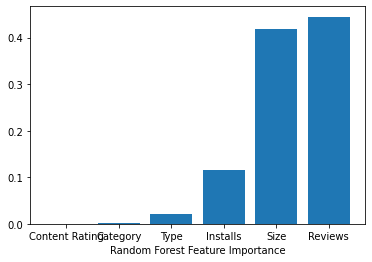

In [54]:
rf.feature_importances_

sorted_idx = rf.feature_importances_.argsort()
plt.bar(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<h4>Permutation Importance

Permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. As arguments it requires trained model and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

Text(0.5, 0, 'Permutation Importance')

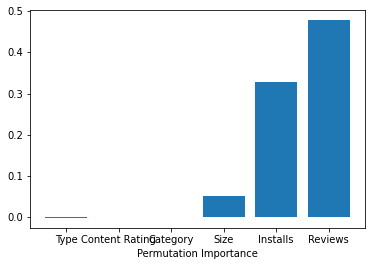

In [55]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()

plt.bar(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

<h4>Multi-class Classification Models

<h4>Categorical Feature Modeling to Predict App Rate

In [56]:
features_reset= features_reset.drop('App', axis=1)

<h4>Continuous Feature Modeling to Predict App Rating

In [57]:
app_df_reset

,Rating,Category,Reviews,Size,Installs,Type,Content Rating
0,4.1,1,159,19000000,10000,1,0
1,3.9,1,967,14000000,500000,1,0
2,4.7,1,87510,8700000,5000000,1,0
3,4.5,1,215644,25000000,50000000,1,0
4,4.3,1,967,2800000,100000,1,0
...,...,...,...,...,...,...,...
7718,4.8,0,44,619000,1000,1,0
7719,4.0,0,7,2600000,500,1,0
7720,4.5,0,38,53000000,5000,1,0
7721,5.0,0,4,3600000,100,1,0


accuracy of model: 0.2713384221386539


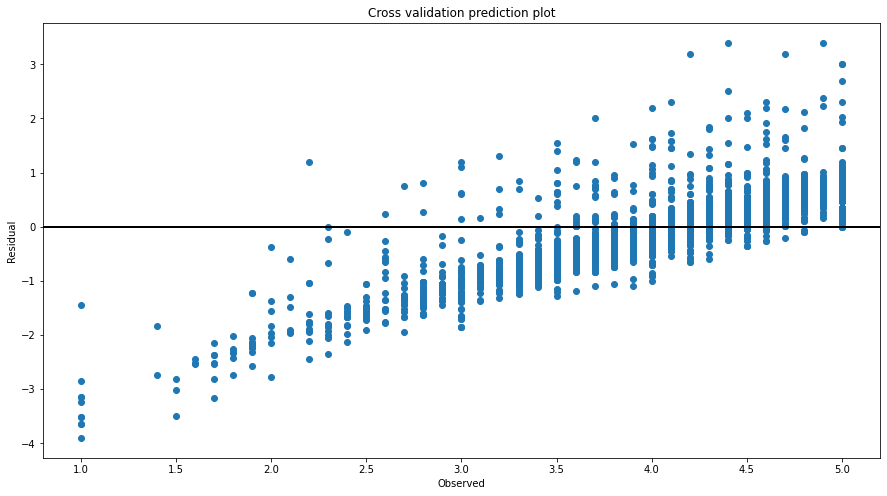

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = features_reset.iloc[:,1:]
y = features_reset.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

ct = ColumnTransformer([('X_train', MinMaxScaler(), ['Reviews','Size'])], remainder ='passthrough')

X_train = ct.fit_transform(X_train)

model= DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=100)
model.fit(X_train,y_train)
model_score=model.score(X_train,y_train)
print('accuracy of model:', model_score)



X_test = ct.fit_transform(X_test)
y_pred = model.predict(X_test)


#Plot the learned model
from sklearn import tree
import pydot
import graphviz


# export the learned model to tree
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph



predict=cross_val_predict(model,X_train,y_train,cv=3)
predict


# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [59]:
#Continuous Variables for Scaling
cont_features = ['Reviews','Size','Installs']
X2 = app_df_reset[cont_features]
y = app_df_reset['Rating'].values

Decision Tree Regressor using one-hot Categorical Feature Columns and MinMaxScaling for Reviews, Size, Installs

accuracy of model: 0.23987097832687054


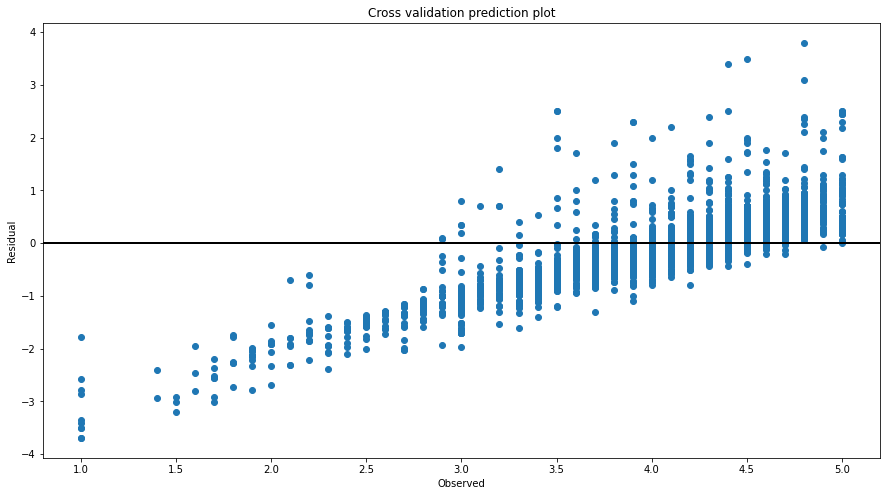

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = app_df_reset.iloc[:,1:]
y = app_df_reset.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

ct = ColumnTransformer([('X_train', MinMaxScaler(), ['Reviews','Size', 'Installs'])], remainder ='passthrough')

X_train = ct.fit_transform(X_train)

model= DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=100)
model.fit(X_train,y_train)
model_score=model.score(X_train,y_train)
print('accuracy of model:', model_score)



X_test = ct.fit_transform(X_test)
y_pred = model.predict(X_test)


#Plot the learned model
from sklearn import tree
import pydot
import graphviz


# export the learned model to tree
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph



predict=cross_val_predict(model,X_train,y_train,cv=3)
predict


# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

<h4>Mean Target Threshold Encoding

Target Groupby App Rating

In [61]:
ratings_count =features_reset.Rating.value_counts()
ratings_count_list = ratings_count.tolist()
total = ratings_count.sum()

print(ratings_count.sort_index())
print(ratings_count_list)
print(total)

1.0     16
1.2      1
1.4      3
1.5      3
1.6      4
1.7      8
1.8      8
1.9     12
2.0     11
2.1      8
2.2     14
2.3     20
2.4     19
2.5     19
2.6     24
2.7     23
2.8     42
2.9     43
3.0     74
3.1     62
3.2     59
3.3     98
3.4    115
3.5    153
3.6    158
3.7    198
3.8    272
3.9    333
4.0    480
4.1    593
4.2    739
4.3    818
4.4    834
4.5    821
4.6    646
4.7    421
4.8    216
4.9     86
5.0    269
Name: Rating, dtype: int64
[834, 821, 818, 739, 646, 593, 480, 421, 333, 272, 269, 216, 198, 158, 153, 115, 98, 86, 74, 62, 59, 43, 42, 24, 23, 20, 19, 19, 16, 14, 12, 11, 8, 8, 8, 4, 3, 3, 1]
7723


<h4>K-means 

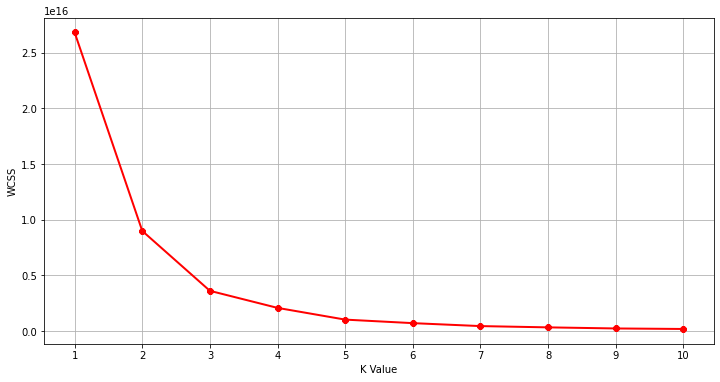

In [62]:
from sklearn.cluster import KMeans
X2=features_reset[["Reviews"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [63]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(X2) #fit and assign
features_reset["label_1"] = clusters #labels to column

In [64]:
print((features_reset.label_1).value_counts())

0    7505
4     144
2      50
1      20
3       4
Name: label_1, dtype: int64


In [65]:
revdf0 = features_reset[features_reset.label_1 ==0]
revdf0

reviews0_cnt= revdf0["Reviews"].value_counts()
reviews0_min= revdf0["Reviews"].min()
reviews0_max= revdf0["Reviews"].max()
print(reviews0_min)
print(reviews0_max)
print(reviews0_cnt.sum())

1
2045554
7505


In [66]:
revdf1 = features_reset[features_reset.label_1 ==1]
revdf1

reviews1_cnt= revdf1["Reviews"].value_counts()
reviews1_min= revdf1["Reviews"].min()
reviews1_max= revdf1["Reviews"].max()
print(reviews1_min)
print(reviews1_max)
print(reviews1_cnt.sum())

17712922
27725352
20


In [67]:
revdf4 = features_reset[features_reset.label_1 ==4]
revdf4

reviews4_cnt= revdf4["Reviews"].value_counts()
reviews4_min= revdf4["Reviews"].min()
reviews4_max= revdf4["Reviews"].max()
print(reviews4_min)
print(reviews4_max)
print(reviews4_cnt.sum())

2119218
6702776
144


In [68]:
revdf2 = features_reset[features_reset.label_1 ==2]
revdf2

reviews2_cnt= revdf2["Reviews"].value_counts()
reviews2_min= revdf2["Reviews"].min()
reviews2_max= revdf2["Reviews"].max()
print(reviews2_min)
print(reviews2_max)
print(reviews2_cnt.sum())

7590099
14201891
50


In [69]:
revdf3 = features_reset[features_reset.label_1 ==3]
revdf3

reviews3_cnt= revdf3["Reviews"].value_counts()
reviews3_min= revdf3["Reviews"].min()
reviews3_max= revdf3["Reviews"].max()
print(reviews3_min)
print(reviews3_max)
print(reviews3_cnt.sum())

44881447
44893888
4


actual review tier cell divisions<br>
7505 = 1-2,045,554 <br>
144 = 3,452,530-6,702,776<br>
50 = 7,590,099-14,201,891<br>
24 = 17,712,922-44,893,888<br>

In [70]:
review_conditions = [
(features_reset.Reviews <= 2045554) & (features_reset.Reviews >= 1),
(features_reset.Reviews <= 6800000) & (features_reset.Reviews >= 2119218),
(features_reset.Reviews <= 14300000) & (features_reset.Reviews >= 7500000),
(features_reset.Reviews <= 45000000) & (features_reset.Reviews >= 17000000),
]
review_values = ["1-2.5M","3M-6.5M","7.5M-14M","17M-45M"]
features_reset['Review Group'] = np.select(review_conditions, review_values)

In [71]:
features_reset = pd.get_dummies(features_reset, columns=['Review Group'])
features_reset

,Rating,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,label_1,Review Group_1-2.5M,Review Group_17M-45M,Review Group_3M-6.5M,Review Group_7.5M-14M
0,4.1,159,19000000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3.9,967,14000000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,4.7,87510,8700000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,4.5,215644,25000000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,4.3,967,2800000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,4.8,44,619000,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7719,4.0,7,2600000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7720,4.5,38,53000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7721,5.0,4,3600000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Size Tiers (5) - as determined by cluster division 

In [72]:
size_conditions = [
(features_reset.Size <= 12000000) & (features_reset.Size >= 8500),
(features_reset.Size <= 28000000) & (features_reset.Size >= 13000000),
(features_reset.Size <= 48000000) & (features_reset.Size >= 28000000),
(features_reset.Size <= 73000000) & (features_reset.Size >= 49000000),
(features_reset.Size >= 74000000),
]
size_values = ["8.5K-12M","13M-28M","29M-48M","49M-73M","74M+"]
features_reset['Size Group'] = np.select(size_conditions, size_values)

In [73]:
features_reset = pd.get_dummies(features_reset, columns=['Size Group'])
features_reset

,Rating,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,label_1,Review Group_1-2.5M,Review Group_17M-45M,Review Group_3M-6.5M,Review Group_7.5M-14M,Size Group_13M-28M,Size Group_29M-48M,Size Group_49M-73M,Size Group_74M+,Size Group_8.5K-12M
0,4.1,159,19000000,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,3.9,967,14000000,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,4.7,87510,8700000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4.5,215644,25000000,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4.3,967,2800000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,4.8,44,619000,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7719,4.0,7,2600000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7720,4.5,38,53000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7721,5.0,4,3600000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [74]:
features_reset = features_reset.drop('Size', axis=1)
features_reset = features_reset.drop('Reviews', axis=1)

features_reset = features_reset.drop('label_1', axis =1)
features_reset

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


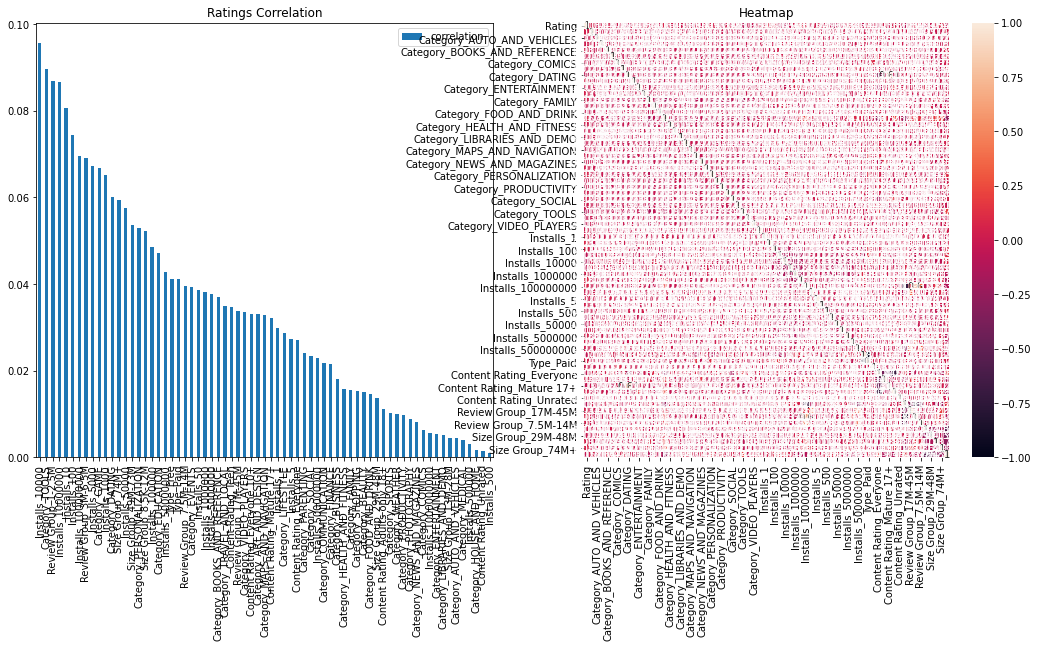

In [75]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

correlation = pd.DataFrame({'correlation' : features_reset.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=features_reset.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()

In [76]:
correlation

,correlation
Installs_10000,0.095554
Category_TOOLS,0.089536
Review Group_1-2.5M,0.086825
Installs_10000000,0.086596
Installs_10,0.080622
...,...
Category_MEDICAL,0.003967
Installs_500000,0.003051
Category_HOUSE_AND_HOME,0.001794
Content Rating_Unrated,0.001545


In [ ]:
features_reset

In [ ]:
X = features_reset.iloc[:,1:]
y = features_reset.iloc[:,0]

In [ ]:
ratings = features_reset.groupby('Rating').sum()
ratings

<b>Normalization

Scaling Continuous Feature Values of skewed distribution and determinately incompatible value thresholds <br>

In [ ]:
from sklearn.preprocessing import MinMaxScaler #normalization 0:1
mms = MinMaxScaler()
mms.fit(X2)
data_transformed = mms.transform(X2)
dataset = pd.DataFrame(data_transformed)
print(dataset.describe())
#['Reviews','Size','Installs']

Normalization used to scale features 'Reviews', 'Size', 'Installs' on a 0 to 1 scale. Best used when feature values do not follow a gaussian distribution. Applied only to continuous variables. <br>
In this case it is not applied to target variable 'Rating'.<br><b>
MinMaxScaler class of sk.learn.preprocessing is used for Normalization.

<b>Standardized Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler #Standardization - mean:0, STD:1 to normalize distribution 
trans = StandardScaler()
data_standard = trans.fit_transform(X2)
dataset_standard = pd.DataFrame(data_standard)
print(dataset_standard.describe())
dataset_standard.head()

Standardization used to scale features 'Reviews, 'Size', 'Installs' by centering the features at a mean of 0 with a (unit) standard deviation of 1 so that the feature columns have the same parameters as standard normal distribution. Unlike normalized distribution it maintains useful outlier information while remaining less sensitive to them. It does not have a bounding range. <br><b>
StandardScaler class of sk.learn.preprocessing is used for Standardization.

In [ ]:
'''success option
success = [(app_df_new['Rating'] >=4.2),
          (app_df_new['Rating'] <4.2)]
values = ['Success', 'Not Success']
app_df_new['Success'] = np.select(success, values)
app_df_new.head()
'''